# Background

### MEG experiment
We investigated the early evoked activity (0-175 ms) elicited by a brief tap to the D3 digit and source localized to an an equivalent current dipole in the contralateral hand area of the primary somatosensory cortex (SI) [1]. 

The strength of the tap was set at either suprathreshold (100% detection probability) or perceptual threshold (50% detection) levels (see Figure 1, left panel below). 

Note, to be precise, this data represents source localized event related field (ERF) activity because it was collected using MEG. We use the terminology ERP for simplicity, since the primary current dipoles generating evoked fields and potentials are the same.

### Hypothesis

Early evoked activity (0-175 ms) can be explained by an initial “feedforward” input from the lemniscal thalamus, followed by “feedback” input from higher order cortex or non-lemniscal thalamus, followed by a re-emergent leminsical thalamic drive to a local cortical column. 

**Motivation**: Intracranial recordings in non-human primates [2].

### Testing

The exogenous driving inputs were simulated as predefined trains of action potentials (pre-synaptic spikes) that activated excitatory synapses in the local cortical circuit in proximal and distal projection patterns (i.e. feedforward, and feedback, respectively, as shown schematically in Figure 1 right). 

**Parameter tuning** The number, timing and strength (post-synaptic conductance) of the driving spikes were manually adjusted in the model until a close representation of the data was found (all other model parameters were tuned and fixed based on the morphology, physiology and connectivity within layered neocortical circuits [1].)

<center><table><tr>
    <a href="https://raw.githubusercontent.com/jonescompneurolab/hnn-tutorials/master/erp/images/image8.png"><img class="imgcenter100" src="https://raw.githubusercontent.com/jonescompneurolab/hnn-tutorials/master/erp/images/image8.png" alt="image8" style="max-width:650px;"/></a>
</tr><tr>
        <div style='max-width:650px; font-size:0.8em;'>
Comparison of SI evoked response in experiment and neural model simulation. <b>Left</b>: MEG data showing tactile evoked response (ERP) source localized to the hand area of SI. Red: suprathreshold stimulation; Blue: Threshold stimulation (avg. n=100 trials). <b>Right</b>: Neural model simulation depicting proximal/distal inputs needed to replicate the ERP waveform (avg. n=25 trials)
    </div>
</tr></table></center>

**Note**: a scaling factor was applied to net dipole output to match to the magnitude of the recorded ERP data and used to predict the number of neurons contributing to the recorded ERP (purple circle, Figure 1, right panel). The dipole units were in nAm, with a one-to-one comparison between data and model output due to the biophysical detail in our model.

### Finding

Indeed, we could reproduce evoked responses that accurately reflected the recorded waveform in our neocortical model from a layer specific sequence of exogenous excitatory synaptic drive to the local SI circuit. This drive consisted of

1. “feedforward” / proximal input at ~25 ms post-stimulus, followed by
2. “feedback” / distal input at ~60 ms, followed by
3. A “feedforward” / proximal input at ~125 ms (Gaussian distribution of input times on each simulated trial). 

**Interpretation**: This sequence of drive generated spiking activity and intracellular dendritic current flow in the pyramidal neuron dendrites to reproduce the current dipole signal. 

### References
1. Jones, S. R., Pritchett, D. L., Stufflebeam, S. M., Hämäläinen, M. & Moore, C. I. Neural correlates of tactile detection: a combined magnetoencephalography and biophysically based computational modeling study. J. Neurosci. 27, 10751–10764 (2007).

2. Cauller, L. J. & Kulics, A. T. The neural basis of the behaviorally relevant N1 component of the somatosensory-evoked potential in SI cortex of awake monkeys: evidence that backward cortical projections signal conscious touch sensation. Exp. Brain Res. 84, 607–619 (1991).

## 1. Importing python libraries and loading data

Let's retrieve and load the experimental dipole. This is the average SI threshold-level evoked response from detected (yes) trials.

In [1]:
from urllib.request import urlretrieve
data_url = ('https://raw.githubusercontent.com/jonescompneurolab/hnn/master/'
            'data/MEG_detection_data/yes_trial_S1_ERP_all_avg.txt')
urlretrieve(data_url, 'yes_trial_S1_ERP_all_avg.txt')

('yes_trial_S1_ERP_all_avg.txt', <http.client.HTTPMessage at 0x7fcbf15a77c0>)

Then we read the dipole using ``hnn-core``

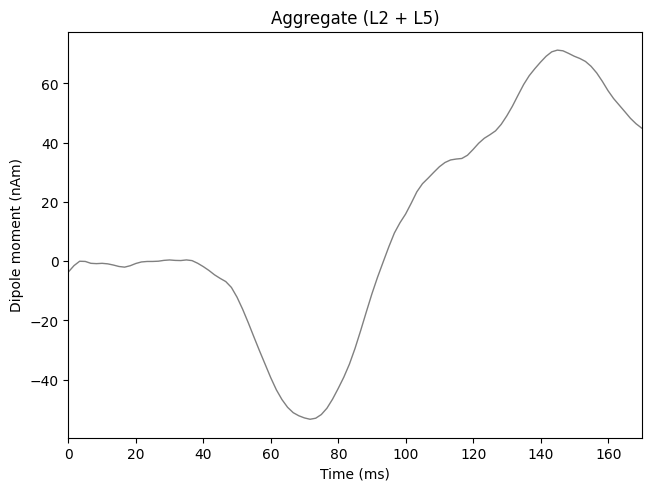

In [2]:
from hnn_core import read_dipole

exp_dpl = read_dipole('yes_trial_S1_ERP_all_avg.txt')
exp_dpl.plot();

## 2. Running a simulation
We're going to try using HNN to simulate a waveform that looks like the experimental dipole waveform plotted above.

Instantiate the network model

In [39]:
from hnn_core import jones_2009_model

net = jones_2009_model()

Now we add a proximal drive at around 26 ms. The proximal drive represents a feedforward input from the lemniscal thalamus. <a href="https://raw.githubusercontent.com/jonescompneurolab/hnn-under_the_hood/master/html-styling/images/prox-drive.png"><img class="imgcenter100" src="https://raw.githubusercontent.com/jonescompneurolab/hnn-under_the_hood/master/html-styling/images/prox-drive.png" alt="image8" style="max-width:650px;"/></a>

In [40]:
weights_ampa_p1 = {'L2_basket': 0.08831, 'L2_pyramidal': 0.01525,
                   'L5_basket': 0.19934, 'L5_pyramidal': 0.00865}
synaptic_delays_prox = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                        'L5_basket': 1., 'L5_pyramidal': 1.}

# all NMDA weights are zero; pass None explicitly
net.add_evoked_drive(
    'evprox1', mu=26.61, sigma=2.47, numspikes=1, weights_ampa=weights_ampa_p1,
    weights_nmda=None, location='proximal',
    synaptic_delays=synaptic_delays_prox, event_seed=4)



We can check that the drives have been added by looking at

In [41]:
net.external_drives

{'evprox1': <External drive 'evprox1'
 drive class: evoked
 target location: proximal
 target cell types: ['L2_basket', 'L2_pyramidal', 'L5_basket', 'L5_pyramidal']
 number of drive cells: 270
 cell-specific: True
 dynamic parameters:
 	mu: 26.61
 	sigma: 2.47
 	numspikes: 1>}

Then we add a distal drive at around 63 ms. This represents "feedback" input from higher-order cortex. <a href="https://raw.githubusercontent.com/jonescompneurolab/hnn-under_the_hood/master/html-styling/images/dist-drive.png"><img class="imgcenter100" src="https://raw.githubusercontent.com/jonescompneurolab/hnn-under_the_hood/master/html-styling/images/dist-drive.png" alt="image8" style="max-width:650px;"/></a>

In [42]:
weights_ampa_d1 = {'L2_basket': 0.006562, 'L2_pyramidal': .000007,
                   'L5_pyramidal': 0.142300}
weights_nmda_d1 = {'L2_basket': 0.019482, 'L2_pyramidal': 0.004317,
                   'L5_pyramidal': 0.080074}
synaptic_delays_d1 = {'L2_basket': 0.1, 'L2_pyramidal': 0.1,
                      'L5_pyramidal': 0.1}

net.add_evoked_drive(
    'evdist1', mu=63.53, sigma=3.85, numspikes=1, weights_ampa=weights_ampa_d1,
    weights_nmda=weights_nmda_d1, location='distal',
    synaptic_delays=synaptic_delays_d1, event_seed=4)

Finally, we add a second proximal drive at around 137 ms that represents a re-emergent lemniscal thalamic drive. 
Intracranial recordings in non-human primates motivated and supported this assumption [2].

In [43]:
weights_ampa_p2 = {'L2_basket': 0.000003, 'L2_pyramidal': 1.438840,
                   'L5_basket': 0.008958, 'L5_pyramidal': 0.684013}

# all NMDA weights are zero; omit weights_nmda (defaults to None)
net.add_evoked_drive(
    'evprox2', mu=137.12, sigma=8.33, numspikes=1,
    weights_ampa=weights_ampa_p2, location='proximal',
    synaptic_delays=synaptic_delays_prox, event_seed=4)

Now, we simulate the dipole with just one trial for now

In [44]:
from hnn_core import simulate_dipole

dpls = simulate_dipole(net, tstop=170., n_trials=1);

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


The simulation is a bit slow. If we want to speed it up, we can use MPI. It's a protocol that splits the simulation across neurons. You might need to follow a few extra installation steps to install MPI dependencies if you wish to run `MPIBackend` on your machine (see [here](https://jonescompneurolab.github.io/hnn-core/stable/parallel.html)).

In [45]:
from hnn_core import MPIBackend

# simulate dipole with a specific parallel backend (2 trials)
# we'll use MPIBackend for the remainder of this tutorial as it is the fastest
with MPIBackend(n_procs=4):
    dpls = simulate_dipole(net, tstop=170., n_trials=2)

/Users/mainak/Desktop/github_repos/hnn-core/hnn_core/parallel_backends.py:632: UserWarning: mpi4py not installed. Will run on single processor
  warn(f'{packages} not installed. Will run on single processor')


MPIBackend is set to use 1 core: transferring the simulation to JoblibBackend....
Joblib will run 2 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Building the NEURON model
[Done]
Trial 2: 0.03 ms...
Trial 2: 10.0 ms...
Trial 2: 20.0 ms...
Trial 2: 30.0 ms...
Trial 2: 40.0 ms...
Trial 2: 50.0 ms...
Trial 2: 60.0 ms...
Trial 2: 70.0 ms...
Trial 2: 80.0 ms...
Trial 2: 90.0 ms...
Trial 2: 100.0 ms...
Trial 2: 110.0 ms...
Trial 2: 120.0 ms...
Trial 2: 130.0 ms...
Trial 2: 140.0 ms...
Trial 2: 150.0 ms...
Trial 2: 160.0 ms...


## 3. Plotting and visualization

The simulation returns a list of dipoles with length equal to number of trials.

In [46]:
dpls

First we'll plot the raw waveform that is unsmoothed and unscaled

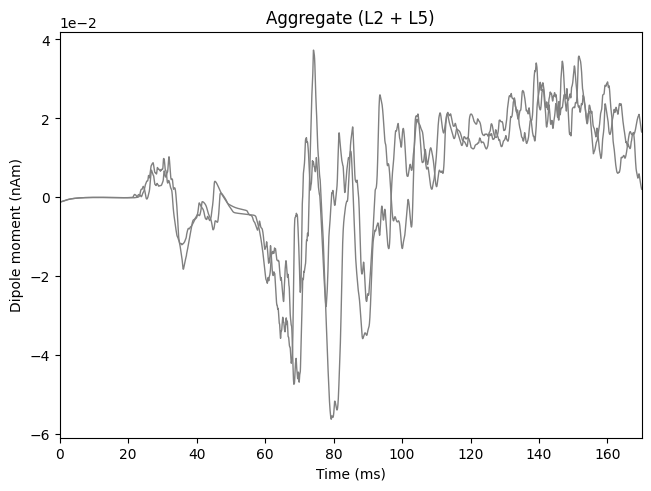

In [47]:
from hnn_core.viz import plot_dipole

plot_dipole(dpls);

Now, note that we simulated a network of 10 x 10 pyramidal cells but human cortex contains much more neurons and the MEG signals usually represent synchronous activation of at least ~50,000 pyramidal neurons. Hence, we must scale the signal to match the source localized data. Averaging across so many neurons will also smooth the signal. Hence for a better comparison, we should smooth and scale

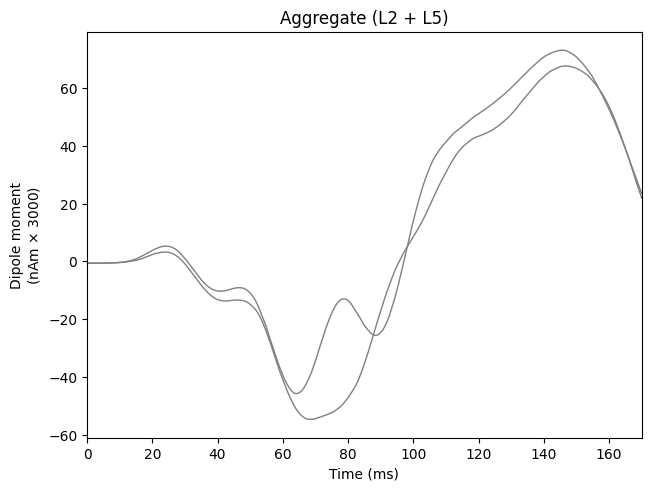

In [48]:
window_len, scaling_factor = 30, 3000
for dpl in dpls:
    dpl.smooth(window_len).scale(scaling_factor)

plot_dipole(dpls);

Let's see what the simulated dipole looks like compared to the experimental dipole. We will also visualize the spike histograms of the drive for easy interpretation.

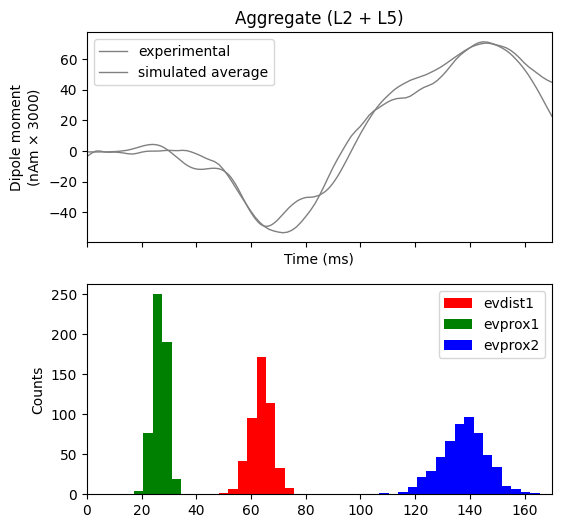

In [49]:
import matplotlib.pyplot as plt
from hnn_core import average_dipoles

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(6, 6))

avg_dpl = average_dipoles(dpls)
exp_dpl.plot(ax=axes[0], show=False)
avg_dpl.plot(ax=axes[0], show=False)

axes[0].legend(['experimental', 'simulated average'])

# driving input spike histogram
net.cell_response.plot_spikes_hist(ax=axes[1]);

We can also plot the dipole generated by the pyramidal cells in L2/3 and L5, respectively. Looking at this plot, we can conclude that the aggregate activity mainly originates from the L5 cells.

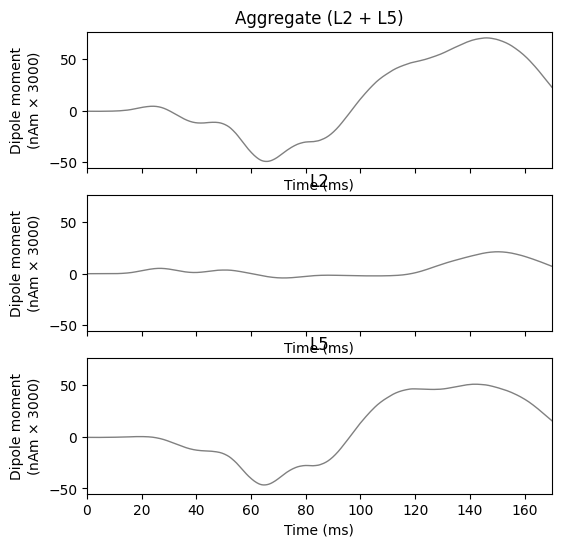

In [50]:
# plot layer-specific dipoles
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(6, 6), sharey=True)

for idx, layer in enumerate(['agg', 'L2', 'L5']):
    plot_dipole(avg_dpl, ax=axes[idx], layer=layer, show=False)

We can also plot the spiking activity stored in `net.cell_response`:

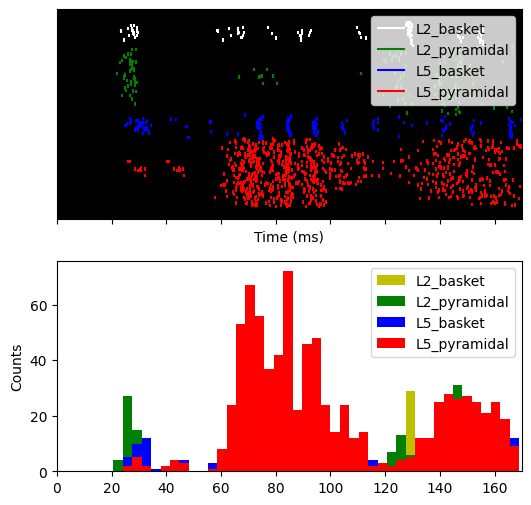

In [51]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(6, 6))
net.cell_response.plot_spikes_raster(ax=axes[0], show=False);
net.cell_response.plot_spikes_hist(ax=axes[1],
                                   spike_types=['L5_pyramidal', 'L2_pyramidal', 'L5_basket', 'L2_basket']);

## 4. Laminar recordings

We’ll place the recording array in the center of the network. By default, a value of 0.3 S/m is used for the constant extracellular conductivity and the ‘point source approximation’ for calculations

In [52]:
depths = list(range(-325, 2150, 100))
electrode_pos = [(135, 135, dep) for dep in depths]
net.add_electrode_array('shank1', electrode_pos)

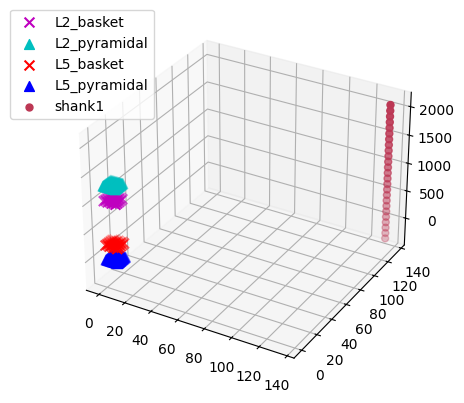

In [53]:
net.plot_cells();

In [ ]:
dpls = simulate_dipole(net, tstop=170)

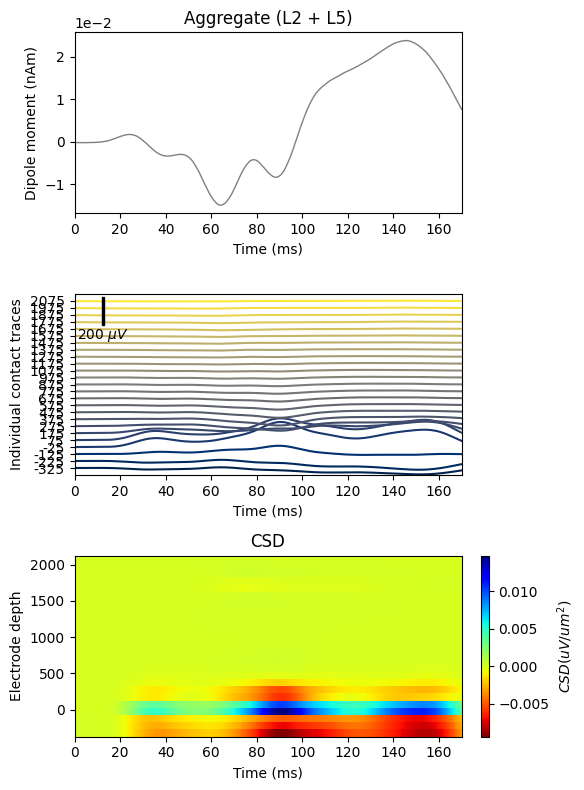

In [31]:
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

decim = [5, 4]
dpl, rec_array = dpls[0], net.rec_arrays['shank1'][0]

dpl.smooth(window_len=window_len)
rec_array.smooth(window_len=window_len)

dpl.plot(ax=axs[0], decim=decim, show=False)
rec_array.plot_lfp(ax=axs[1], decim=decim, show=False)
rec_array.plot_csd(ax=axs[2]);

## 5. Modifying connectivity

In [32]:
net.connectivity[:2]

[L2_pyramidal -> L2_pyramidal
 cell counts: 100 srcs, 100 targets
 connection probability: 1.0 
 loc: 'proximal'; receptor: 'nmda'
 weight: 0.0005; delay: 1.0; lamtha: 3.0
  ,
 L2_pyramidal -> L2_pyramidal
 cell counts: 100 srcs, 100 targets
 connection probability: 1.0 
 loc: 'proximal'; receptor: 'ampa'
 weight: 0.0005; delay: 1.0; lamtha: 3.0
  ]

In [33]:
conn = net.connectivity[0]
conn['nc_dict']  # weight, delay, and spread (lamtha) of the connecitivity weights

{'A_delay': 1.0, 'A_weight': 0.0005, 'lamtha': 3.0, 'threshold': 0.0}

In [34]:
from hnn_core import pick_connection

conn_idxs = pick_connection(net, receptor=['gabaa'])
[net.connectivity[conn_idx] for conn_idx in conn_idxs]

[L2_basket -> L2_pyramidal
 cell counts: 35 srcs, 100 targets
 connection probability: 1.0 
 loc: 'soma'; receptor: 'gabaa'
 weight: 0.05; delay: 1.0; lamtha: 50.0
  ,
 L5_basket -> L5_pyramidal
 cell counts: 35 srcs, 100 targets
 connection probability: 1.0 
 loc: 'soma'; receptor: 'gabaa'
 weight: 0.025; delay: 1.0; lamtha: 70.0
  ,
 L2_basket -> L5_pyramidal
 cell counts: 35 srcs, 100 targets
 connection probability: 1.0 
 loc: 'distal'; receptor: 'gabaa'
 weight: 0.001; delay: 1.0; lamtha: 50.0
  ,
 L2_basket -> L2_basket
 cell counts: 35 srcs, 35 targets
 connection probability: 1.0 
 loc: 'soma'; receptor: 'gabaa'
 weight: 0.02; delay: 1.0; lamtha: 20.0
  ,
 L5_basket -> L5_basket
 cell counts: 35 srcs, 35 targets
 connection probability: 1.0 
 loc: 'soma'; receptor: 'gabaa'
 weight: 0.02; delay: 1.0; lamtha: 20.0
  ]

## 5. Build your own hypothesis

* Try adjusting the duration and strength of the distal drive; how does this affect the simulation?

* Try adding an additional proximal or distal drive; how does this affect the simulation?

* What happens to the ERP if the E/I balance has changed?

In [35]:
# your code here

## Recording voltages

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...


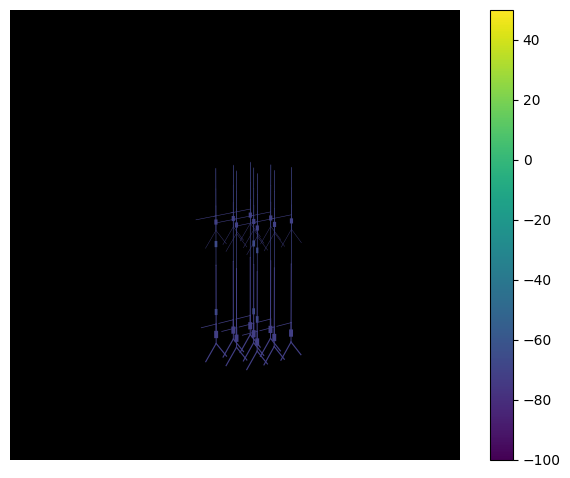

In [38]:
from hnn_core.network_models import add_erp_drives_to_jones_model
from hnn_core.viz import NetworkPlotter

net = jones_2009_model(mesh_shape=(3, 3))

# Note that we move the cells further apart to allow better visualization of
# the network (default inplane_distance=1.0 µm).
net.set_cell_positions(inplane_distance=300)

add_erp_drives_to_jones_model(net)
dpl = simulate_dipole(net, tstop=170, record_vsec='all')

net_plot = NetworkPlotter(net)
net_plot.export_movie('animation_demo.gif', dpi=100, fps=30, interval=100)

from IPython.display import Image
Image(url='animation_demo.gif')

## 6. Adjusting parameters

### 6.1 Changing the timing and strength (post-synaptic conductance) of the evoked inputs
For this part of the tutorial, we’ll load a different experimental dataset, at first keeping the simulation parameters that we started out with. The new experimental data represents the evoked response (ER) from non-detected threshold level stimuli in the experiment described in the introduction section above [1].

Once we load the new ER waveform, notice that the timing and magnitude of the peaks in this new  are different than for the ERs that were detected.

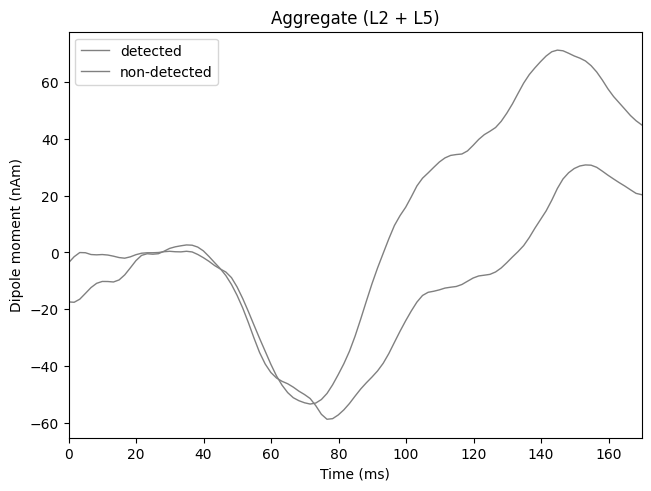

In [16]:
# retrieve and load the experimental dipole
data_url = ('https://raw.githubusercontent.com/jonescompneurolab/hnn/master/'
            'data/MEG_detection_data/no_trial_S1_ERP_all_avg.txt')
urlretrieve(data_url, 'no_trial_S1_ERP_all_avg.txt')
exp_dpl_nd = read_dipole('no_trial_S1_ERP_all_avg.txt')

# compare to previous experimental dipole
fig = exp_dpl.plot(show=False)
ax = fig.gca()
fig = exp_dpl_nd.plot(ax=ax, show=False)
ax.legend(['detected', 'non-detected'])
plt.show()

Given that the non-detection ER (orange) has peaks that occure slightly later and are decreased in magnitude, we will test the following hypotheses about its origin in relation to the detected ER:
1. The non-detected ER represents a decrease in the strength of the inputs that create the evoked response
2. The non-detected ER can be produced by a more delayed arrival time of these inputs to the network

Recalling our previous drive values for the "detected" case....

In [ ]:
# early proximal
weights_ampa_p1 = {'L2_basket': 0.08831, 'L2_pyramidal': 0.01525,
                   'L5_basket': 0.19934, 'L5_pyramidal': 0.00865}
mu_p1, sigma_p1 = 26.61, 2.47

# distal
weights_ampa_d1 = {'L2_basket': 0.006562, 'L2_pyramidal': .000007,
                   'L5_pyramidal': 0.142300}
weights_nmda_d1 = {'L2_basket': 0.019482, 'L2_pyramidal': 0.004317,
                   'L5_pyramidal': 0.080074}
mu_d1, sigma_d1 = 63.53, 3.85

# late proximal 
weights_ampa_p2 = {'L2_basket': 0.000003, 'L2_pyramidal': 1.438840,
                   'L5_basket': 0.008958, 'L5_pyramidal': 0.684013}
mu_p2, sigma_p2 = 137.12, 8.33

Starting with a clean network (i.e., one without any drives added to it), we can modify the parameters associated with each drive according to our hypotheses

In [ ]:
# re-instantiate the network
net = jones_2009_model()

In [ ]:
# distal
weights_ampa_d1['L2_basket'] += 6.28098
weights_ampa_d1['L2_pyramidal'] += 2.07921
weights_ampa_d1['L5_pyramidal'] += -0.13717

mu_d1 += 8.57
sigma_d1 += 1.15

net.add_evoked_drive(
    'evdist1', mu=mu_d1, sigma=sigma_d1, numspikes=1, weights_ampa=weights_ampa_d1,
    location='distal', synaptic_delays=synaptic_delays_d1, event_seed=4)

In [ ]:
# early proximal
weights_ampa_p1['L2_basket'] += -0.03280
weights_ampa_p1['L2_pyramidal'] += -0.00450
weights_ampa_p1['L5_basket'] += 0.00347
weights_ampa_p1['L5_pyramidal'] += -0.00841

mu_p1 += 13.99
sigma_p1 += 0.03

net.add_evoked_drive(
    'evprox1', mu=mu_p1, sigma=sigma_p1, numspikes=1, weights_ampa=weights_ampa_p1,
    location='proximal', synaptic_delays=synaptic_delays_prox, event_seed=4)

In [ ]:
# late proximal
weights_ampa_p2['L2_basket'] += 0.00399
weights_ampa_p2['L2_pyramidal'] += -1.38763
weights_ampa_p2['L5_basket'] += 0.00409
weights_ampa_p2['L5_pyramidal'] += -0.30884

mu_p2 += 7.58
sigma_p2 += 5.87

net.add_evoked_drive(
    'evprox2', mu=mu_p2, sigma=sigma_p2, numspikes=1,
    weights_ampa=weights_ampa_p2, location='proximal',
    synaptic_delays=synaptic_delays_prox, event_seed=4)

Run the simulation and see if our changes to the drive parameters result in a good match to the new (non-detected) experimental ER

In [ ]:
with MPIBackend(n_procs=4):
    dpls = simulate_dipole(net_with_drives, tstop=170., n_trials=n_trials)
for dpl in dpls:
    dpl.smooth(window_len).scale(scaling_factor)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(6, 6), constrained_layout=True)

exp_dpl_nd.plot(ax=axes[0], show=False)
average_dipoles(dpls).plot(ax=axes[0], show=False)
axes[0].legend(['experimental', 'sim. avg.'])
fig = net.cell_response.plot_spikes_hist(ax=axes[1],
                                         spike_types=['evprox', 'evdist'])

### 6.3 Drive parameter optimization
Instead of manually tuning the drive parameters to match the non-detected ERP, now we're going try optimizing the original parameters using an algorithmic approach.

In [39]:
from hnn_core.optimization import optimize_evoked

optimize_evoked?

Signature:
optimize_evoked(
    net,
    tstop,
    n_trials,
    target_dpl,
    initial_dpl,
    maxiter=50,
    timing_range_multiplier=3.0,
    sigma_range_multiplier=50.0,
    synweight_range_multiplier=500.0,
    decay_multiplier=1.6,
    scale_factor=1.0,
    smooth_window_len=None,
    dt=0.025,
    which_drives='all',
    return_rmse=False,
)
Docstring:
Optimize drives to generate evoked response.

Parameters
----------
net : Network instance
    An instance of the Network object with attached evoked drives. Timing 
    and synaptic weight parameters will be optimized for each attached 
    evoked drive. Note that no new drives will be created or old drives 
    destroyed.
tstop : float
    The simulation stop time (ms).
n_trials : int
    The number of trials to simulate.
target_dpl : instance of Dipole
    The target experimental dipole.
initial_dpl : instance of Dipole
    The initial dipole to start the optimization.
maxiter : int
    The maximum number of simulations to r

Finally, let's run a simulation with the optimized parameter set and see if the simulated dipole better matches the empirical dipole

Online example [here](https://jonescompneurolab.github.io/hnn-core/dev/auto_examples/howto/optimize_rhythmic.html#sphx-glr-auto-examples-howto-optimize-rhythmic-py)

## 5. Object-oriented structure of HNN-core

Recall that we originally created the network by calling `net = jones_2009_model()`. This object represents the laminar SI model as originally presented in Jones et al. (2009), and gets modified by running the simulation. Let's visualize where the cell somas are positioned within the network in 3D space.

In [ ]:
net

In [ ]:
net.plot_cells();

Cell connectivity is defined for each cell type (`L2_basket`, `L2_pyramidal`, `L5_basket`, and `L5_pyramidal`) and receptor (`ampa`, `nmda`, `gabaa`, and `gabab`)

In [ ]:
net.connectivity[:2]

The cell properties are also visible

In [ ]:
net.cell_types['L5_pyramidal'].synapses

Our L5 pyramidal neurons have 9 compartments

In [ ]:
net.cell_types['L5_pyramidal'].sections.keys()

In [ ]:
net.cell_types['L5_pyramidal'].plot_morphology();

In [ ]:
net.cell_types['L5_pyramidal'].sections['apical_trunk']

and the synapses on to this section

In [ ]:
net.cell_types['L5_pyramidal'].sections['apical_trunk'].syns

## 7 Exercises for further exploration (optional)

### 7.1 Asynchronous vs. synchronous drive
By default, HNN-Core provides an independently sampled spike train for each cell targetted by an exogenous drive. We call this an asynchonous drive because different cells receive asynchronous driving spikes. Let's try to make the exogenous driving inputs to the cells synchronous and see what happens. This can be accomplished in the model my specifying that each drive consists of only 1 artificial cell (i.e., a single source of spikes for the network) and delivers spike trains that are not cell-specific (i.e., they target all network cells).

In [ ]:
# using the previously defined synaptic weight and delay values,
# we'll create a new network and add the same pattern of drives as before except with
# n_drive_cells=1 and cell_specific=False

net_sync = jones_2009_model()

#n_drive_cells=1
#cell_specific=False

# [add the drives here]

In [ ]:
# now simulate with our custom higher-level functions
#dpls = simulate_and_smooth(net_sync)

#fig = plot_sim(net_sync, dpls)

### 7.2 Adjusting other parameters

* View the evoked responses for different values of the scaling parameter; how does this affect the simulation?

* View the evoked responses for different values of the smoothing parameter; how does this affect the simulation?

* View the average evoked response generated by running more trials in a simulation; how does this affect the simulation?

* Try importing another network from the [templates provided](https://jonescompneurolab.github.io/hnn-core/stable/api.html#network-models-hnn-core). Can you figure out how these models are different from the original model? Try running a simulation with these models.